In [181]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city = "data/city_data.csv"
ride = "data/ride_data.csv"
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)


In [153]:
merge_df = pd.merge(city_df, ride_df, on="city", how="outer")

In [154]:
urban_city = merge_df.loc[(merge_df["type"] == "Urban")]
suburban_city = merge_df.loc[(merge_df["type"] == "Suburban")]
rural_city = merge_df.loc[(merge_df["type"] == "Rural")]

In [176]:
avg_fare_urban = urban_city.groupby('city')['fare'].mean()
total_rides_urban = urban_city.groupby('city').count()['ride_id']
drivers_urban = urban_city.groupby('city')['driver_count'].value_counts()

In [177]:
avg_fare_sub = suburban_city.groupby('city')['fare'].mean()
total_rides_sub = suburban_city.groupby('city').count()['ride_id']
drivers_sub = suburban_city.groupby('city')['driver_count'].value_counts()

In [178]:
avg_fare_rural = rural_city.groupby('city')['fare'].mean()
total_rides_rural = rural_city.groupby('city').count()['ride_id']
drivers_rural = rural_city.groupby('city')['driver_count'].value_counts()

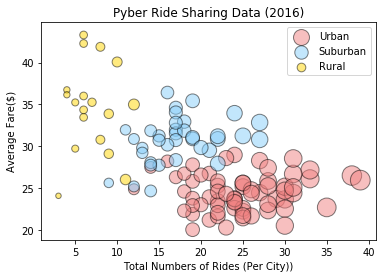

In [180]:
plt.scatter(total_rides_urban, avg_fare_urban,s=drivers_urban*10,
            marker ='o', facecolors ="lightcoral",alpha = 0.5, edgecolor = 'black', label="Urban")
plt.scatter(total_rides_sub, avg_fare_sub,s=drivers_sub*10,
            marker ='o', facecolors ="lightskyblue",alpha = 0.5, edgecolor = 'black', label="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural,s=drivers_rural*10,
            marker ='o', facecolors ="gold",alpha = 0.5, edgecolor = 'black',label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')
plt.show()


## Bubble Plot of Ride Sharing Data

In [167]:
plt.show()

## Total Fares by City Type

In [117]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [118]:
organized_df = merge_df [["type", "fare"]]
organized_df.groupby('type').aggregate("type")

In [119]:
organized_df['fare'].sum()

63538.64

In [120]:
rural= 43227.93/organized_df['fare'].sum()*10

In [121]:
sub = 19356.33/organized_df['fare'].sum()*100

In [122]:
urban = 39854.38/organized_df['fare'].sum()*100

In [123]:
purchase_count = organized_df.groupby('type')['fare'].sum()
purchase_count.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [124]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [rural.round(2), sub.round(2), urban.round(2)]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, .08, 0)

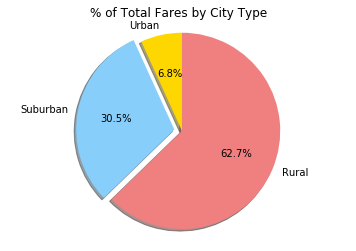

In [125]:
 plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Total Rides by City Type

In [126]:
organized_df['type'].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [127]:
total_rides =organized_df['type'].count()

In [128]:
rural_ride = 1625/total_rides*100
sub_ride = 625/total_rides*100
urban_ride = 125/total_rides*100

In [163]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [rural_ride.round(2), sub_ride.round(2), urban_ride.round(2)]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0, .08, 0)

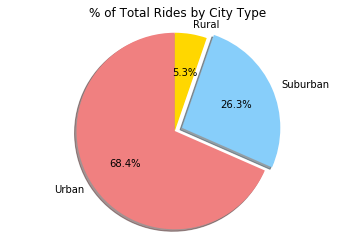

In [164]:
 plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Total Drivers by City Type

In [131]:
city_data = merge_df.drop_duplicates('city')
city_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354


In [132]:
percent_count = city_data [['type', "driver_count"]]
percent_df = percent_count.groupby('type')['driver_count'].sum()
percent_df.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

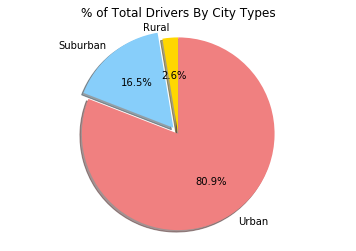

In [182]:
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0.08, 0)
plt.title("% of Total Drivers By City Types")
plt.pie(percent_df, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()